In [199]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
# load data
df = pd.read_csv("../data/202503-capitalbikeshare-tripdata.csv")
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,B62C76AD61DFE4A5,classic_bike,2025-03-07 08:45:59.496,2025-03-07 08:47:56.041,20th & O St NW / Dupont South,31234.0,New Hampshire Ave & Ward Pl NW,31212.0,38.908905,-77.044780,38.905711,-77.047318,member
1,20883512A96C1496,electric_bike,2025-03-24 09:37:36.233,2025-03-24 09:45:26.549,33rd St & Wisconsin Ave NW,31337.0,18th & L St NW,31224.0,38.912181,-77.066074,38.903741,-77.042452,member
2,34DB085578274D9C,classic_bike,2025-03-10 08:37:28.678,2025-03-10 09:19:04.343,Langston Blvd & N Cleveland St,31079.0,1st & I St SE,31628.0,38.894941,-77.091690,38.878854,-77.005727,member
3,1804A3706C620EC8,classic_bike,2025-03-11 08:39:00.732,2025-03-11 09:24:04.729,Langston Blvd & N Cleveland St,31079.0,1st & I St SE,31628.0,38.894941,-77.091690,38.878854,-77.005727,member
4,5A6A07F6A594DBC5,classic_bike,2025-03-25 08:22:12.145,2025-03-25 09:07:29.835,Langston Blvd & N Cleveland St,31079.0,1st & I St SE,31628.0,38.894941,-77.091690,38.878854,-77.005727,member
5,97BB3994DE3ACC9B,classic_bike,2025-03-12 08:22:57.212,2025-03-12 08:28:45.205,6th St & Indiana Ave NW,31264.0,15th St & New York Ave NW,31222.0,38.894573,-77.019940,38.899032,-77.033354,member
6,FD9F7789322B8356,classic_bike,2025-03-31 12:58:53.766,2025-03-31 13:07:29.064,20th & O St NW / Dupont South,31234.0,15th St & New York Ave NW,31222.0,38.908905,-77.044780,38.899032,-77.033354,member
7,0572E2FA5C8BE0BB,electric_bike,2025-03-07 07:37:10.133,2025-03-07 07:44:46.430,Columbia Rd & Georgia Ave NW,31115.0,Convention Center / 7th & M St NW,31223.0,38.928121,-77.023795,38.905737,-77.022270,member
8,7D4C91EBE9D177A0,classic_bike,2025-03-26 09:51:50.417,2025-03-26 09:53:11.206,33rd St & Wisconsin Ave NW,31337.0,Wisconsin Ave & O St NW,31312.0,38.912181,-77.066074,38.908490,-77.063586,member
9,4178E9C952B8DEF3,classic_bike,2025-03-07 17:10:20.701,2025-03-07 17:28:43.386,15th & W St NW,31125.0,Wisconsin Ave & K St NW,31225.0,38.919018,-77.034449,38.902801,-77.062819,casual


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626757 entries, 0 to 626756
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             626757 non-null  object 
 1   rideable_type       626757 non-null  object 
 2   started_at          626757 non-null  object 
 3   ended_at            626757 non-null  object 
 4   start_station_name  460635 non-null  object 
 5   start_station_id    460635 non-null  float64
 6   end_station_name    456924 non-null  object 
 7   end_station_id      456837 non-null  float64
 8   start_lat           626757 non-null  float64
 9   start_lng           626757 non-null  float64
 10  end_lat             626434 non-null  float64
 11  end_lng             626434 non-null  float64
 12  member_casual       626757 non-null  object 
dtypes: float64(6), object(7)
memory usage: 62.2+ MB


In [202]:
datetime_columns = ["started_at", "ended_at"]
for col in datetime_columns:
    df[col] = pd.to_datetime(df[col])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626757 entries, 0 to 626756
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             626757 non-null  object        
 1   rideable_type       626757 non-null  object        
 2   started_at          626757 non-null  datetime64[ns]
 3   ended_at            626757 non-null  datetime64[ns]
 4   start_station_name  460635 non-null  object        
 5   start_station_id    460635 non-null  float64       
 6   end_station_name    456924 non-null  object        
 7   end_station_id      456837 non-null  float64       
 8   start_lat           626757 non-null  float64       
 9   start_lng           626757 non-null  float64       
 10  end_lat             626434 non-null  float64       
 11  end_lng             626434 non-null  float64       
 12  member_casual       626757 non-null  object        
dtypes: datetime64[ns](2), float64

In [204]:
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60 # to turn it into minutes

In [205]:
df[["started_at", "ended_at", "ride_duration"]].head()

,started_at,ended_at,ride_duration
0,2025-03-07 08:45:59.496,2025-03-07 08:47:56.041,1.942417
1,2025-03-24 09:37:36.233,2025-03-24 09:45:26.549,7.838600
2,2025-03-10 08:37:28.678,2025-03-10 09:19:04.343,41.594417
3,2025-03-11 08:39:00.732,2025-03-11 09:24:04.729,45.066617
4,2025-03-25 08:22:12.145,2025-03-25 09:07:29.835,45.294833


In [206]:
len(df)

626757

In [207]:
q1, q3 = np.percentile(df['ride_duration'], [25, 75])
iqr = q3 - q1
y_min = q1 - 1.5 * iqr
y_max = q3 + 1.5 * iqr
df = df[(df['ride_duration'] > y_min) & (df['ride_duration'] < y_max)]
len(df)

577562

In [208]:
df = df.reset_index()

In [209]:
# One-Sample T-Test: Is average ride duration different from 10 minutes?
t_stat, p_val = stats.ttest_1samp(df['ride_duration'], 10)
print(f"t stat: {t_stat}", f"p val: {p_val}")

t stat: 47.56292733505195 p val: 0.0


In [210]:
# find critical t value at 5% significance level (95% confidence level)
alpha = 0.05
df_error = len(df['ride_duration']) - 1
t_critical = stats.t.ppf(1 - alpha/2, df_error)
print(f"t_stat: {t_stat:.4f}")
print(f"t_critical (two_tailed): {abs(t_critical):.4f}")

t_stat: 47.5629
t_critical (two_tailed): 1.9600


In [211]:
mean_ride = df['ride_duration'].mean()

In [212]:
test_value = 10
std_dev = df['ride_duration'].std()
cohens_d = (mean_ride - test_value) / std_dev

In [213]:
print(f"Mean: {mean_ride}")
print(f"Cohen's d-stat: {cohens_d}")

Mean: 10.455381531823999
Cohen's d-stat: 0.06258485787135985


In [214]:
# confidence interval
n = len(df['ride_duration'])
std_err = std_dev / np.sqrt(n)
conf_int = stats.t.interval(0.95, n-1, loc=mean_ride, scale=std_err)
print(f"95% Confidence Interval: ({conf_int[0]:.2f}, {conf_int[1]:.2f})")

95% Confidence Interval: (10.44, 10.47)


### Independent t test

In [215]:
member_duration = df[df["member_casual"] == 'member']['ride_duration']
casual_duration = df[df['member_casual'] == 'casual']['ride_duration']

In [216]:
t_stat, p_val = stats.ttest_ind(member_duration, casual_duration)
print(f"t stat: {t_stat}", f"p val: {p_val}")

t stat: -119.75634750772885 p val: 0.0


In [217]:
print(f"Member Mean Duration: {member_duration.mean():.2f} minutes")
print(f"Casual Mean Duration: {casual_duration.mean():.2f} minutes")

Member Mean Duration: 9.76 minutes
Casual Mean Duration: 12.29 minutes


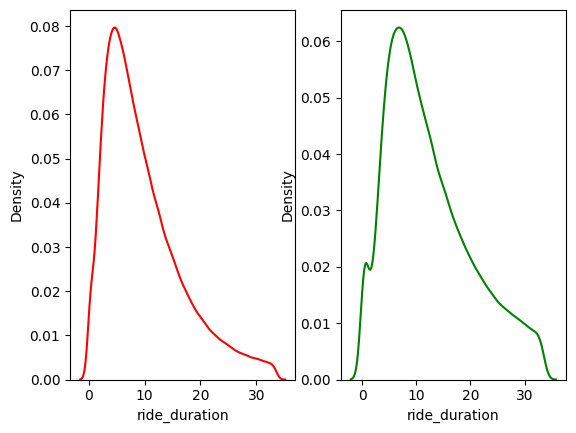

In [218]:
_, ax = plt.subplots(1, 2)
sns.kdeplot(member_duration, color='red', label="Member duration", ax=ax[0])
sns.kdeplot(casual_duration, color='green', label="Casual duration", ax=ax[1])
plt.show()

In [219]:
shapiro_member = stats.shapiro(member_duration)
shapiro_casual = stats.shapiro(casual_duration)
print(f"Member normality test: W={shapiro_member[0]:.4f}, p={shapiro_member[1]:.6f}")
print(f"Casual normality test: W={shapiro_casual[0]:.4f}, p={shapiro_casual[1]:.6f}")

Member normality test: W=0.9099, p=0.000000
Casual normality test: W=0.9431, p=0.000000


d:\ANNACONDA\projects\Applied_Regression_In_Python\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 418205.
  res = hypotest_fun_out(*samples, **kwds)
d:\ANNACONDA\projects\Applied_Regression_In_Python\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 159357.
  res = hypotest_fun_out(*samples, **kwds)


In [220]:
member_duration_log = np.log1p(member_duration)
casual_duration_log = np.log1p(casual_duration)

In [221]:
shapiro_member = stats.shapiro(member_duration_log)
shapiro_casual = stats.shapiro(casual_duration_log)
print(f"Member normality test: W={shapiro_member[0]:.4f}, p={shapiro_member[1]:.6f}")
print(f"Casual normality test: W={shapiro_casual[0]:.4f}, p={shapiro_casual[1]:.6f}")

Member normality test: W=0.9864, p=0.000000
Casual normality test: W=0.9557, p=0.000000


In [223]:
member_duration_boxcox, lambda_member = stats.boxcox(member_duration)
casual_duration_boxcox, lambda_casual = stats.boxcox(casual_duration)

In [224]:
shapiro_member = stats.shapiro(member_duration_boxcox)
shapiro_casual = stats.shapiro(casual_duration_boxcox)
print(f"Member normality test: W={shapiro_member[0]:.4f}, p={shapiro_member[1]:.6f}")
print(f"Casual normality test: W={shapiro_casual[0]:.4f}, p={shapiro_casual[1]:.6f}")

Member normality test: W=0.9958, p=0.000000
Casual normality test: W=0.9910, p=0.000000


d:\ANNACONDA\projects\Applied_Regression_In_Python\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 418205.
  res = hypotest_fun_out(*samples, **kwds)
d:\ANNACONDA\projects\Applied_Regression_In_Python\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 159357.
  res = hypotest_fun_out(*samples, **kwds)


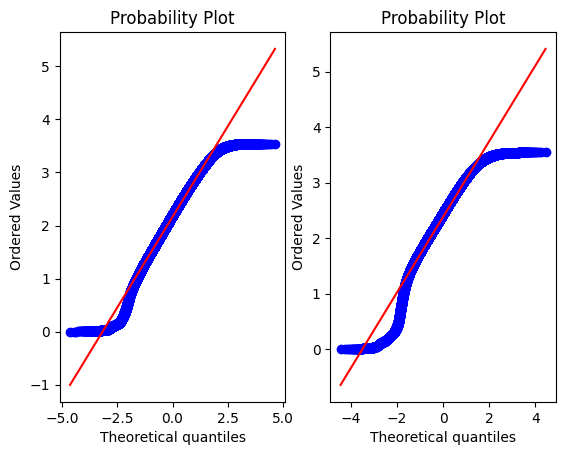

In [225]:
plt.subplot(1, 2, 1)
stats.probplot(member_duration_log, plot=plt)

plt.subplot(1, 2, 2)
stats.probplot(casual_duration_log, plot=plt)
plt.show()

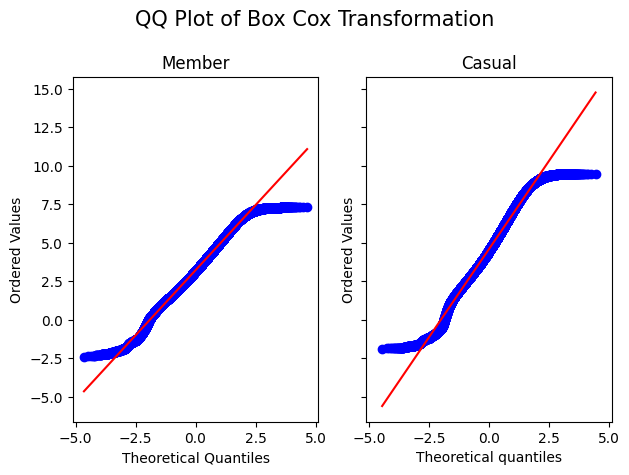

In [226]:
# Create figure with shared x and y axes
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

plt.suptitle("QQ Plot of Box Cox Transformation", fontsize=15)

stats.probplot(member_duration_boxcox, plot=axs[0])
axs[0].set_title("Member")
axs[0].set_xlabel("Theoretical Quantiles")
# axs[0].set_ylabel("Ordered Values")

stats.probplot(casual_duration_boxcox, plot=axs[1])
axs[1].set_title("Casual")
# axs[1].set_xlabel("Theoretical Quantiles")

plt.tight_layout()
plt.subplots_adjust(top=0.84)
plt.show()

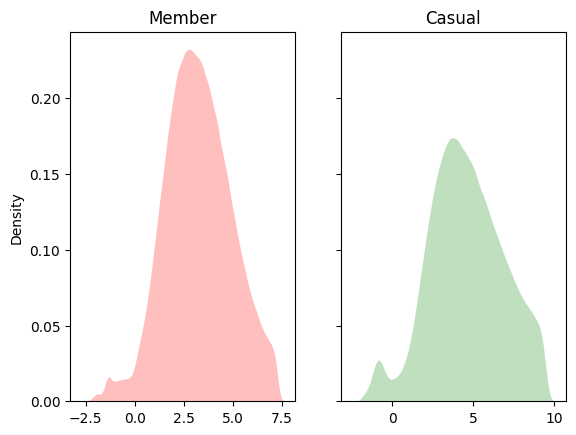

In [227]:
_, ax = plt.subplots(1, 2, sharey=True)
sns.kdeplot(member_duration_boxcox, ax=ax[0], color="red", fill=True, linewidth=0)
sns.kdeplot(casual_duration_boxcox, ax=ax[1], color="green", fill=True, linewidth=0)

ax[0].set_title("Member")
ax[1].set_title("Casual")
plt.show()

In [228]:
lev_stat, lev_p = stats.levene(member_duration_boxcox, casual_duration_boxcox)
print(f"Levene's test: W={lev_stat:.4f}, p={lev_p:.4f}")

Levene's test: W=22791.2658, p=0.0000


In [232]:
t_stat, p_val = stats.ttest_ind(member_duration_boxcox, casual_duration_boxcox, equal_var=(lev_p > 0.05))
print(f"Independent t-test (equal variances):")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

Independent t-test (equal variances):
t-statistic: -214.9065
p-value: 0.0000


In [233]:
print(f"Member Duration Mean: {member_duration.mean()}")
print(f"Casual Duration Mean: {casual_duration.mean()}")

Member Duration Mean: 9.756231276208238
Casual Duration Mean: 12.290180961091552


In [239]:
print(f"Member Duration Length: {len(member_duration)}")
print(f"Casual Duration Length: {len(casual_duration)}")

Member Duration Length: 418205
Casual Duration Length: 159357


In [235]:
mw_test = stats.mannwhitneyu(member_duration, casual_duration, alternative="two-sided")
print(f"Mann-Whitney U test: U={mw_test.statistic:.1f}, p={mw_test.pvalue:.6f}")

Mann-Whitney U test: U=26655035616.5, p=0.000000


In [236]:
bf_stat, bf_p = stats.levene(member_duration_boxcox, casual_duration_boxcox, center='median')
print(f"Brown-Forsythe test: W={bf_stat:.4f}, p={bf_p:.6f}")

Brown-Forsythe test: W=22791.2658, p=0.000000


In [ ]:
def bootstrap_ci(data1, data2, n_bootstrap=5000, statistic=np.mean, ci=95):
    n1, n2 = len(data1), len(data2)
    boot_diffs = []

    for _ in range(n_bootstrap):
        # resample with replacement
        boot_sample1 = np.random.choice(data1, size=n1, replace=True)
        boot_sample2 = np.random.choice(data2, size=n2, replace=True)

        # calculate difference in statistic
        stat1 = statistic(boot_sample1)
        stat2 = statistic(boot_sample2)
        boot_diffs.append(stat1 - stat2)

    # calculate confidence interval
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(boot_diffs, lower_percentile)
    upper_bound = np.percentile(boot_diffs, upper_percentile)

    return lower_bound, upper_bound

# calculate bootstrap CI for mean difference
orig_diff = np.mean(member_duration_boxcox) - np.mean(casual_duration_boxcox)
ci_lower, ci_upper = bootstrap_ci(member_duration_boxcox, casual_duration_boxcox)

print(f"Mean difference (member - casual): {orig_diff:.4f}")
print(f"95% Bootstrap CI: ({ci_lower:.4f}, {ci_upper:.4f})")

Mean difference (member - casual): -1.3603
95% Bootstrap CI: (-1.3730, -1.3472)


In [246]:
percent_diff_orig = ((np.mean(member_duration) - np.mean(casual_duration)) / np.mean(casual_duration)) * 100
percent_diff_boxcox = (orig_diff / np.mean(casual_duration_boxcox)) * 100

print(f"Original Difference: {percent_diff_orig:.2f}%")
print(f"Boxcox Difference: {percent_diff_boxcox:.2f}%")

Original Difference: -20.62%
Boxcox Difference: -29.75%


In [247]:
smaller_n = min(len(member_duration_boxcox), len(casual_duration_boxcox))
larger_group = "member" if len(member_duration_boxcox) > len(casual_duration_boxcox) else "casual"

n_iterations = 100
p_values = []

for i in range(n_iterations):
    if larger_group == "member":
        member_subsample = np.random.choice(member_duration_boxcox, size=smaller_n, replace=False)
        casual_subsample = casual_duration_boxcox
    else:
        member_subsample = member_duration_boxcox
        casual_subsample = np.random.choice(casual_duration_boxcox, size=smaller_n, replace=False)
    
    t_result = stats.ttest_ind(member_subsample, casual_subsample, equal_var=False)
    p_values.append(t_result.pvalue)

print(f"Median p-value across {n_iterations} balanced samples: {np.median(p_values):.6f}")
print(f"Balanced sample result significant at α=0.05: {np.median(p_values) < 0.05}")

Median p-value across 100 balanced samples: 0.000000
Balanced sample result significant at α=0.05: True
